### Question 1

In [1]:
!pip install tabulate --upgrade
!pip install numpy --upgrade
!pip install pandas --upgrade
!pip install matplotlib==3.1.1
!pip install yfinance --upgrade
!pip install pandas_datareader

  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.8.10
    Uninstalling tabulate-0.8.10:
      Successfully uninstalled tabulate-0.8.10
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 25.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.0 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.0 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 30.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 29.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp310-cp310-linux_x86_64.whl size=12066853 sha256=4c6a28d1fce9b80d3327ff5dcb3495b49260ae7b543ca3b78b624acb5b20a966
  Stored in directory: /root/.cache/pip/wheels/89/4a/32/e229c4da4afeeb3ff4eb2f90bf9d6a07c22ccd96f261130d30
Successfully buil

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.21
    Uninstalling yfinance-0.2.21:
      Successfully uninstalled yfinance-0.2.21


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
import yfinance as yf

In [3]:
myticker ='MSFT'
mydata = pd.DataFrame()
mydata[myticker] =yf.download(myticker, start="2019-01-01", end="2021-12-31")['Adj Close']
mydata.columns = {'Close Price'}
mydata.head(10)


[*********************100%***********************]  1 of 1 completed


,Close Price
Date,
2019-01-02,96.421867
2019-01-03,92.874702
2019-01-04,97.194229
2019-01-07,97.318192
2019-01-08,98.023819
2019-01-09,99.425514
2019-01-10,98.786644
2019-01-11,98.023819
2019-01-14,97.308678


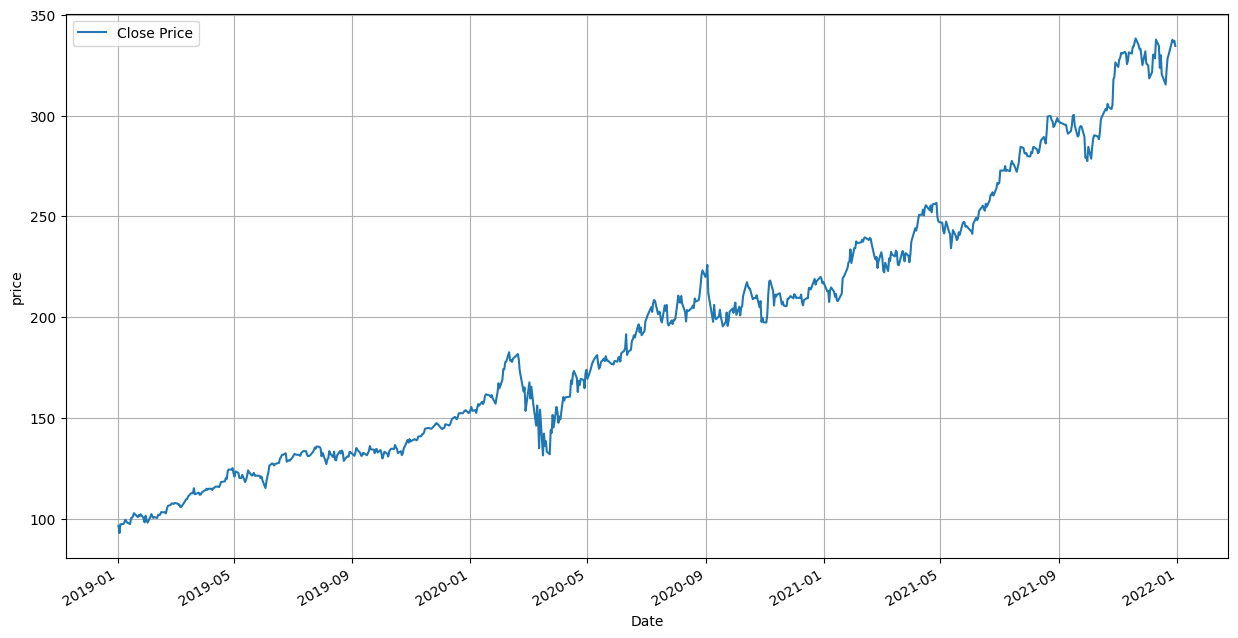

In [4]:
mydata.plot(figsize = (15, 8))
plt.grid()
plt.ylabel("price")
plt.show()

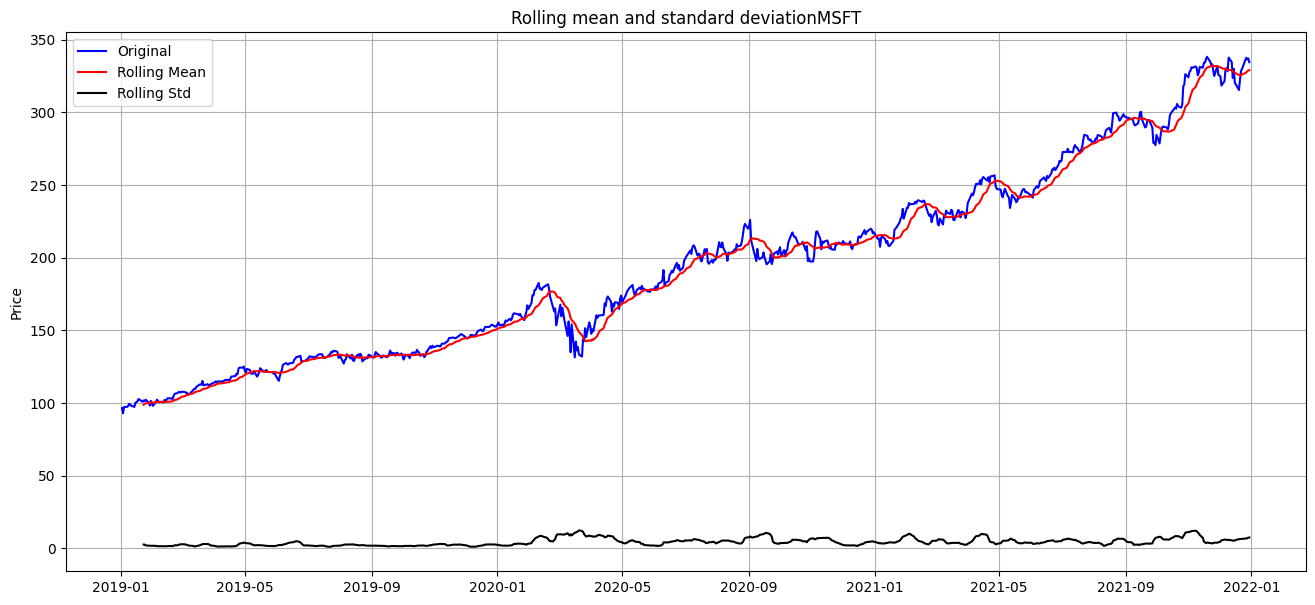

In [5]:
rolling_mean = mydata['Close Price'].rolling(15).mean()
rolling_std = mydata['Close Price'].rolling(15).std()

plt.figure(figsize = (16,7))
fig=plt.figure(1)

orig = plt.plot( mydata ['Close Price' ], color= 'blue',label='Original')
mean = plt.plot (rolling_mean,color ='red',label ='Rolling Mean')
std = plt.plot (rolling_std,color='black',label = 'Rolling Std')
plt.legend(loc ='best')
plt.title('Rolling mean and standard deviation'+ myticker)
plt.grid ()
plt.ylabel("Price")
plt.show()

In [6]:
mydata[ 'SMA10' ] = mydata['Close Price'].rolling(window = 10, min_periods = 1) .mean ()
mydata[ 'SMA6O' ] = mydata['Close Price'].rolling (window = 60, min_periods = 1) . mean ()

mydata.head()

,Close Price,SMA10,SMA6O
Date,,,
2019-01-02,96.421867,96.421867,96.421867
2019-01-03,92.874702,94.648285,94.648285
2019-01-04,97.194229,95.496933,95.496933
2019-01-07,97.318192,95.952248,95.952248
2019-01-08,98.023819,96.366562,96.366562


In [7]:
mydata['Signal'] = 0.0
mydata['Signal'] =np.where(mydata['SMA10'] > mydata['SMA6O'], 1.0, 0.0)

mydata['Position'] = mydata['Signal'].diff()
#display first few rows
mydata.head()

,Close Price,SMA10,SMA6O,Signal,Position
Date,,,,,
2019-01-02,96.421867,96.421867,96.421867,0.0,NaN
2019-01-03,92.874702,94.648285,94.648285,0.0,0.0
2019-01-04,97.194229,95.496933,95.496933,0.0,0.0
2019-01-07,97.318192,95.952248,95.952248,0.0,0.0
2019-01-08,98.023819,96.366562,96.366562,0.0,0.0


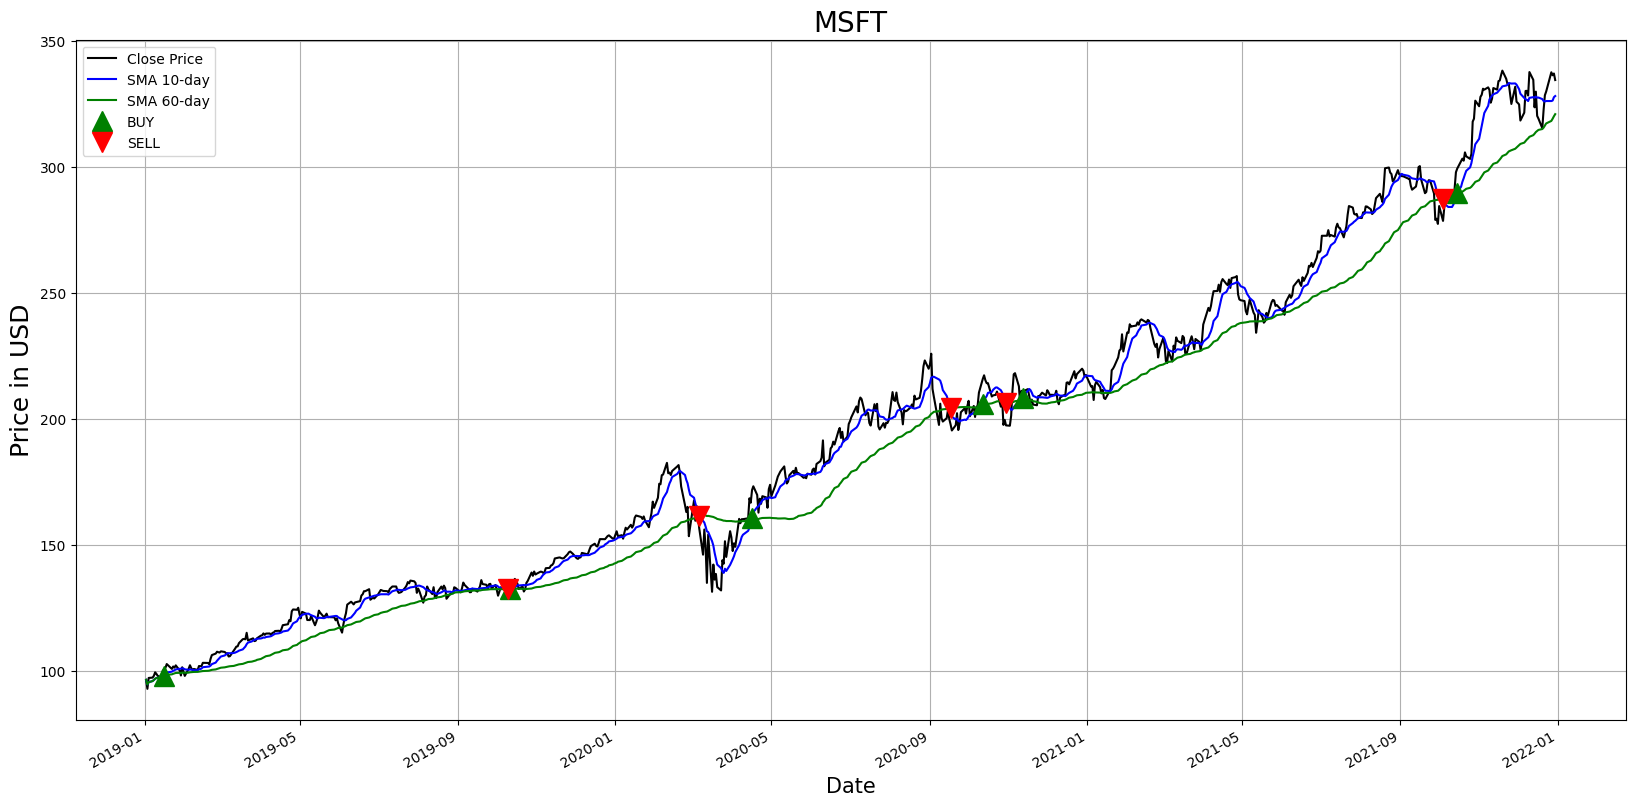

In [8]:
plt.figure(figsize=(20,10))
mydata['Close Price'].plot(color = 'k', label= 'Close Price')
mydata['SMA10'].plot(color = 'b',label = 'SMA 10-day')
mydata['SMA6O'].plot(color = 'g',label ='SMA 60-day')
plt.plot(mydata[mydata[ 'Position'] == 1].index,
         mydata['SMA10'][mydata['Position'] == 1],
         '^', markersize = 15,color ='g', label ='BUY')
plt.plot(mydata[mydata['Position']== -1]. index,
         mydata['SMA6O'][mydata['Position'] ==-1],
         'v',markersize = 15, color ='r',label = 'SELL')
plt.ylabel('Price in USD',fontsize = 18 )
plt.xlabel('Date',fontsize = 15 )
plt.title(myticker, fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [9]:
df_position = mydata[(mydata['Position'] == 1) | (mydata['Position'] == -1)]
df_position['Position']=df_position['Position'].apply(lambda x:'Buy' if x ==1 else 'Sell')
print(tabulate(df_position,headers ='keys',tablefmt='psql'))

+---------------------+---------------+----------+----------+----------+------------+
| Date                |   Close Price |    SMA10 |    SMA6O |   Signal | Position   |
|---------------------+---------------+----------+----------+----------+------------|
| 2019-01-16 00:00:00 |       100.484 |  97.9571 |  97.8175 |        1 | Buy        |
| 2019-10-10 00:00:00 |       134.142 | 132.407  | 132.451  |        0 | Sell       |
| 2019-10-11 00:00:00 |       134.701 | 132.595  | 132.511  |        1 | Buy        |
| 2020-03-06 00:00:00 |       156.768 | 161.553  | 161.554  |        0 | Sell       |
| 2020-04-16 00:00:00 |       171.779 | 160.703  | 159.892  |        1 | Buy        |
| 2020-09-17 00:00:00 |       197.905 | 202.582  | 204.335  |        0 | Sell       |
| 2020-10-12 00:00:00 |       215.939 | 205.81   | 205.189  |        1 | Buy        |
| 2020-10-30 00:00:00 |       197.476 | 205.6    | 206.557  |        0 | Sell       |
| 2020-11-12 00:00:00 |       210.126 | 208.334  | 207

### Question 2

In [10]:
myticker ='KO'
df = pd.DataFrame()
df[myticker] =yf.download(myticker, start="2019-01-01", end="2021-12-31")['Adj Close']
df.columns = {'Close Price'}
df.head(10)

[*********************100%***********************]  1 of 1 completed


,Close Price
Date,
2019-01-02,40.788105
2019-01-03,40.536060
2019-01-04,41.344341
2019-01-07,40.805485
2019-01-08,41.266129
2019-01-09,40.475216
2019-01-10,40.909779
2019-01-11,41.144440
2019-01-14,40.979309


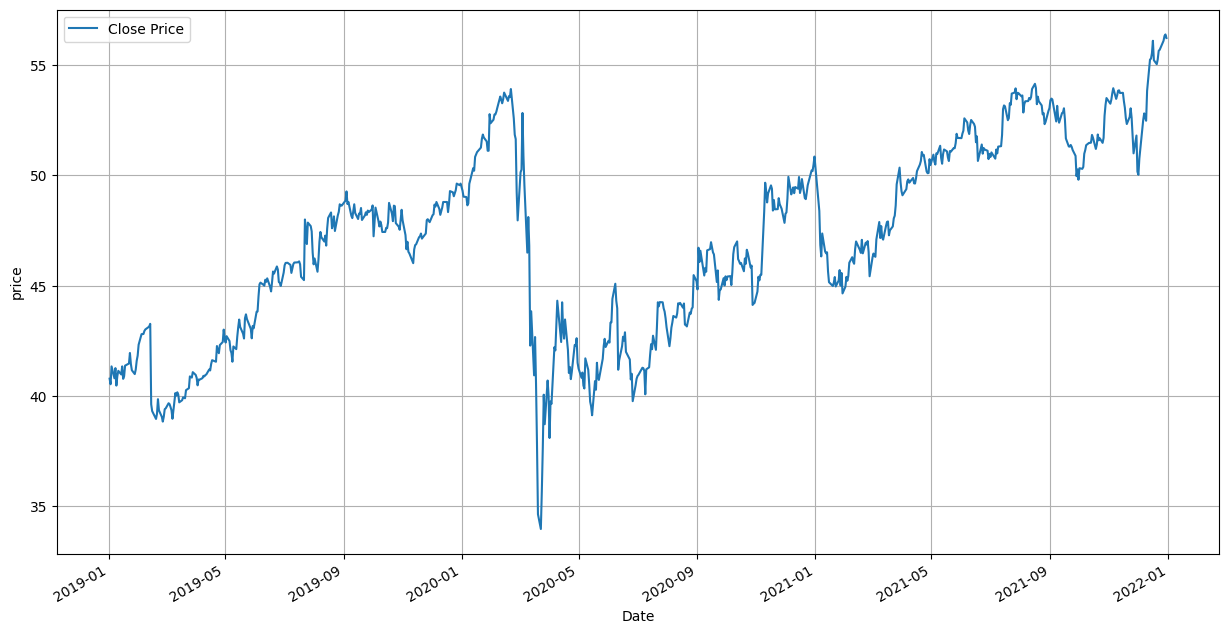

In [11]:
df.plot(figsize = (15, 8))
plt.grid()
plt.ylabel("price")
plt.show()

In [12]:
df['EMA50'] = df['Close Price'].ewm(span = 50, adjust = False).mean()
df['EMA150'] =df['Close Price'].ewm(span =150, adjust= False).mean()
df['Signal'] = 0.0
df['Signal'] =np.where(df['EMA50'] > df['EMA150'], 1.0, 0.0)

df['Position'] = df['Signal'].diff()

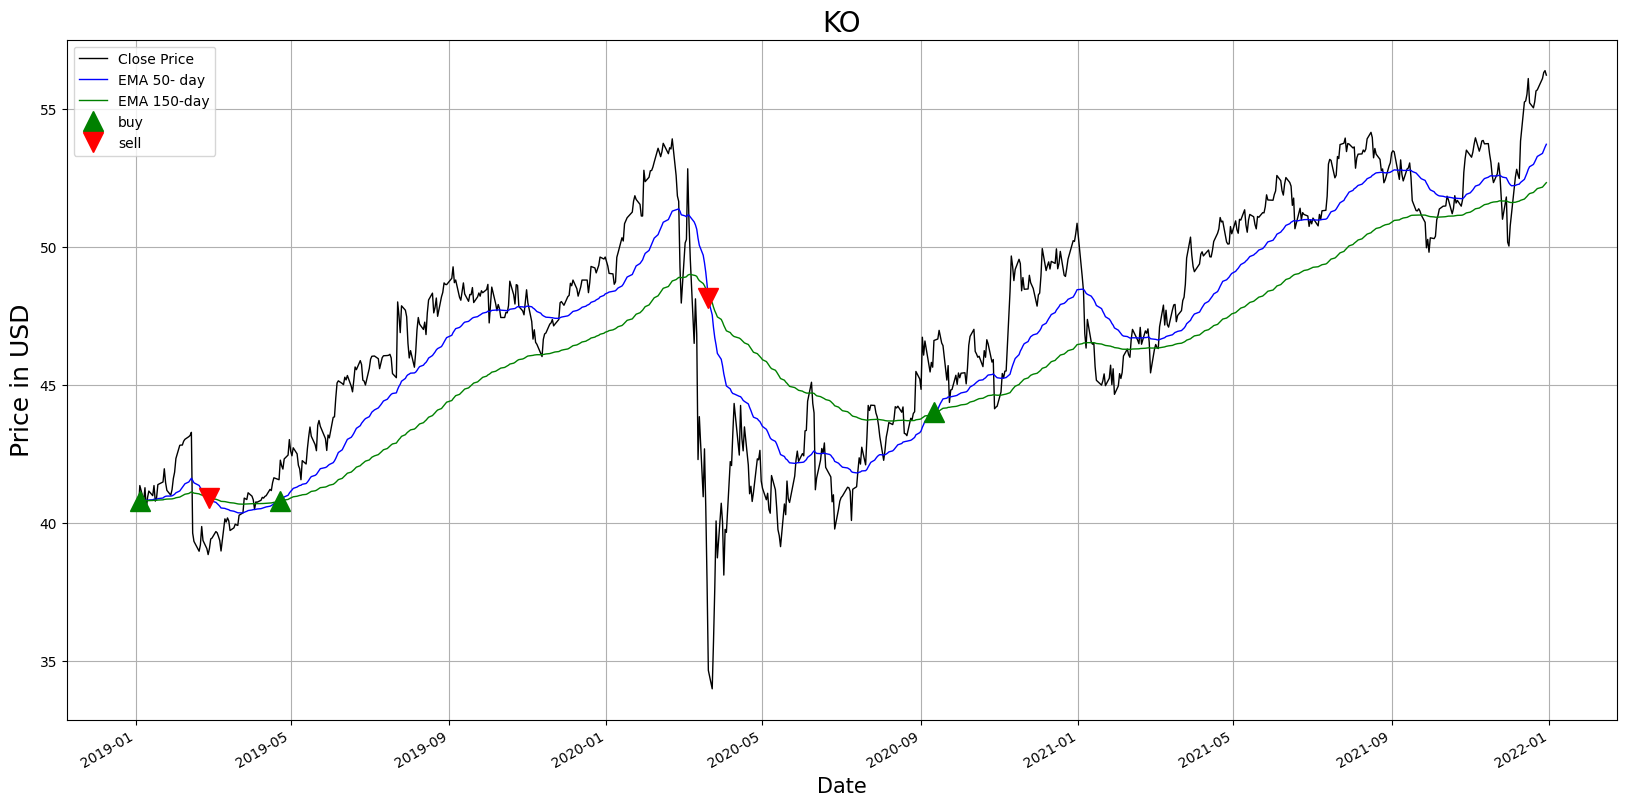

In [13]:
plt. figure(figsize = (20,10))
df['Close Price'].plot(color = 'k',lw = 1, label= 'Close Price')
df['EMA50'].plot(color = 'b', lw=1, label = 'EMA 50- day')
df['EMA150'].plot(color = 'g', lw=1, label ='EMA 150-day')
plt.plot(df[df[ 'Position'] == 1].index,
         df['EMA50'][df['Position'] == 1],
         '^', markersize = 15,color ='g', label ='buy')
plt.plot(df[df['Position']== -1]. index,
         df['EMA150'][df['Position'] ==-1],
         'v',markersize = 15, color ='r',label = 'sell')
plt.ylabel('Price in USD',fontsize = 18 )
plt.xlabel('Date',fontsize = 15 )
plt.title(myticker, fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [14]:
df_position = df[(df['Position'] == 1) | (df['Position'] == -1)]
df_position['Position']=df_position['Position'].apply(lambda x:'Buy' if x ==1 else 'Sell')
print(tabulate(df_position,headers ='keys',tablefmt='psql'))

+---------------------+---------------+---------+----------+----------+------------+
| Date                |   Close Price |   EMA50 |   EMA150 |   Signal | Position   |
|---------------------+---------------+---------+----------+----------+------------|
| 2019-01-04 00:00:00 |       41.3443 | 40.8004 |  40.7922 |        1 | Buy        |
| 2019-02-27 00:00:00 |       39.0585 | 40.8924 |  40.9033 |        0 | Sell       |
| 2019-04-23 00:00:00 |       42.2664 | 40.7829 |  40.7673 |        1 | Buy        |
| 2020-03-20 00:00:00 |       34.6435 | 48.088  |  48.1637 |        0 | Sell       |
| 2020-09-11 00:00:00 |       46.6049 | 44.007  |  43.9738 |        1 | Buy        |
+---------------------+---------------+---------+----------+----------+------------+
